In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("AI_tools_cleaned_dataset.csv")

print("Dataset Shape:", df.shape)

Dataset Shape: (16762, 9)


In [2]:
# DESCRIPTIVE STATISTICS

print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
                       Name                    Category Primary Task  \
count                 16762                       16762        16762   
unique                16609                          14         3495   
top     AI Prompt Generator  Media And Content Creation      Content   
freq                      5                        4289          393   
mean                    NaN                         NaN          NaN   
std                     NaN                         NaN          NaN   
min                     NaN                         NaN          NaN   
25%                     NaN                         NaN          NaN   
50%                     NaN                         NaN          NaN   
75%                     NaN                         NaN          NaN   
max                     NaN                         NaN          NaN   

        Year Founded                              Short Description  \
count   16762.000000                   

Skipped 'Name' (Too many unique categories: 16609)


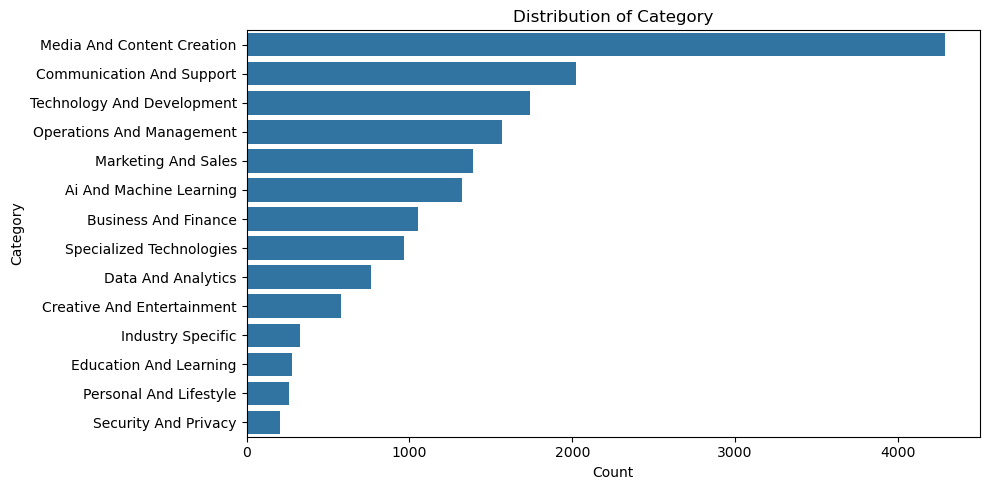

Skipped 'Primary Task' (Too many unique categories: 3495)
Skipped 'Short Description' (Too many unique categories: 16213)
Skipped 'Country' (Too many unique categories: 99)
Skipped 'industry' (Too many unique categories: 95)
Skipped 'Website' (Too many unique categories: 16744)
Skipped 'Website Status' (Too many unique categories: 30)


In [3]:
# UNIVARIATE ANALYSIS 

cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    if df[col].nunique() <= 20:   # Avoid plotting huge category columns
        plt.figure(figsize=(10,5))
        sns.countplot(
            data=df,
            y=col,
            order=df[col].value_counts().index
        )
        plt.title(f"Distribution of {col}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipped '{col}' (Too many unique categories: {df[col].nunique()})")

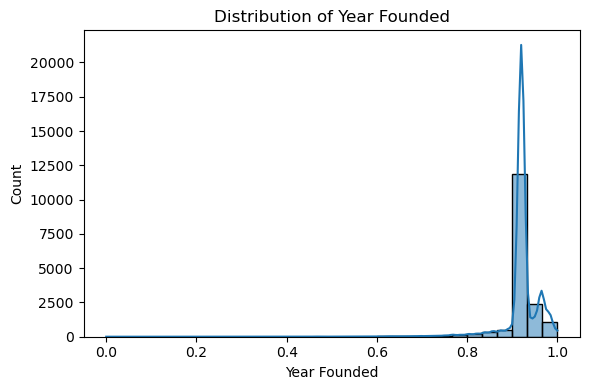

In [4]:
# NUMERICAL DISTRIBUTION 

num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [5]:
# CORRELATION HEATMAP 

if len(num_cols) > 1:
    plt.figure(figsize=(10,6))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

print("\nEDA Completed Successfully")


EDA Completed Successfully


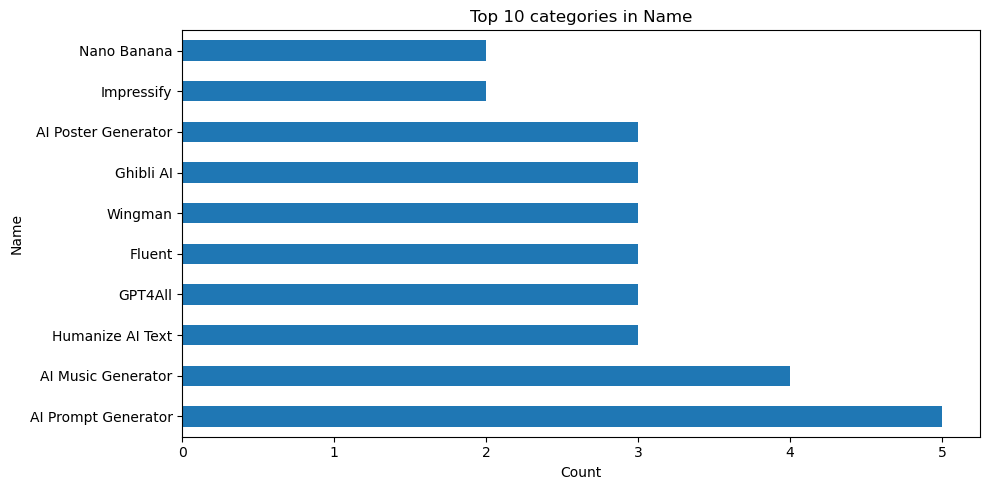

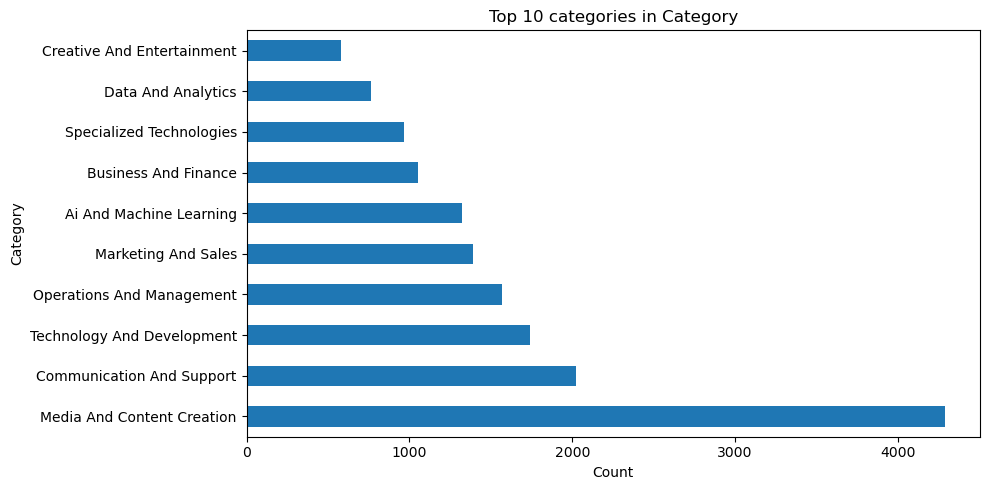

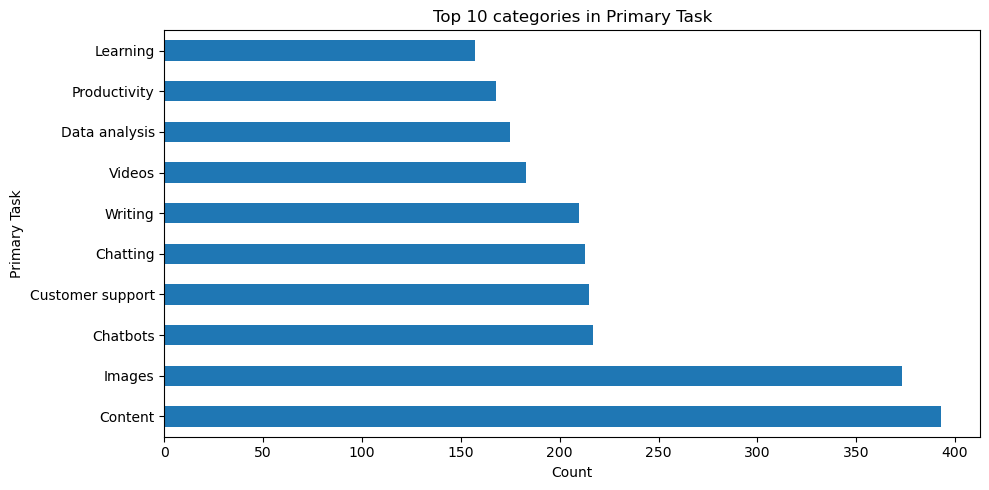

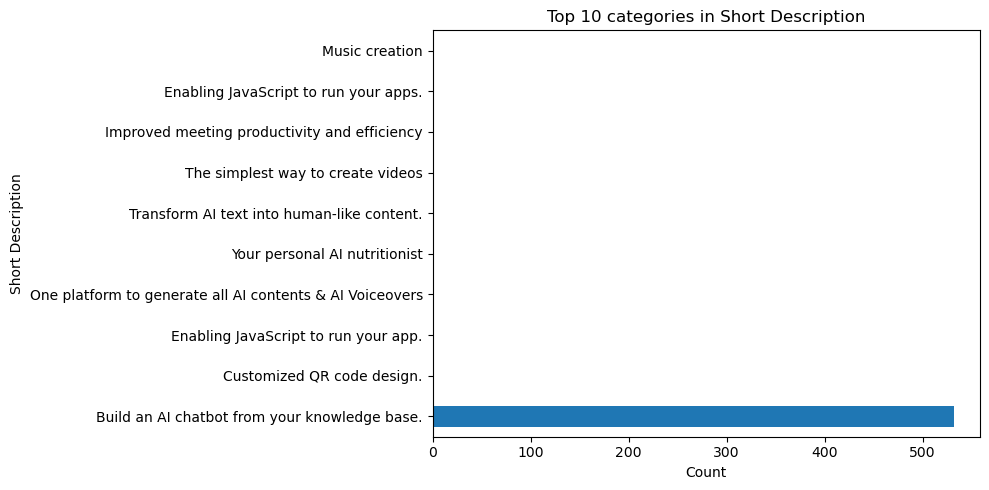

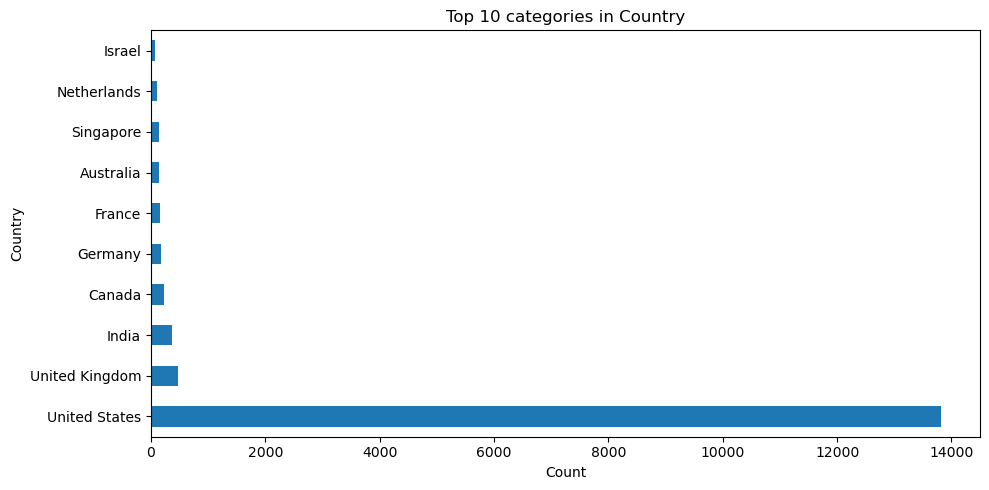

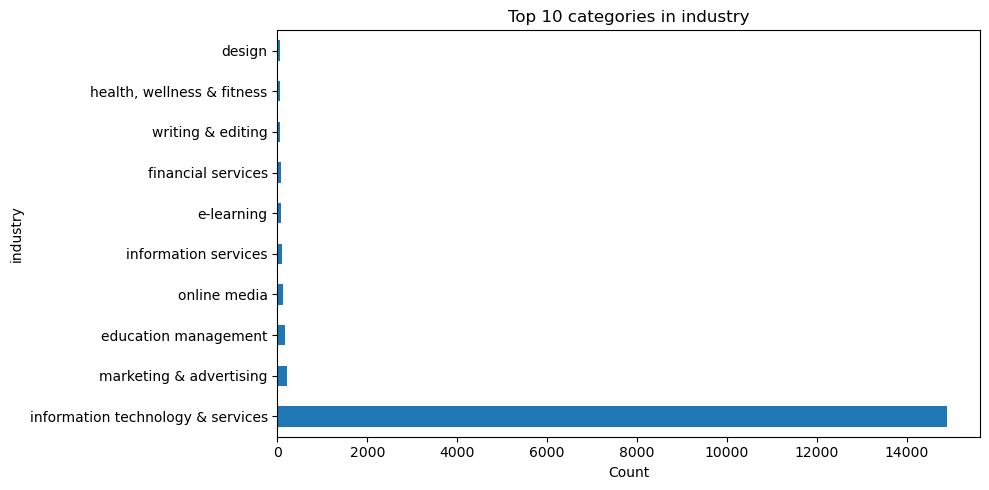

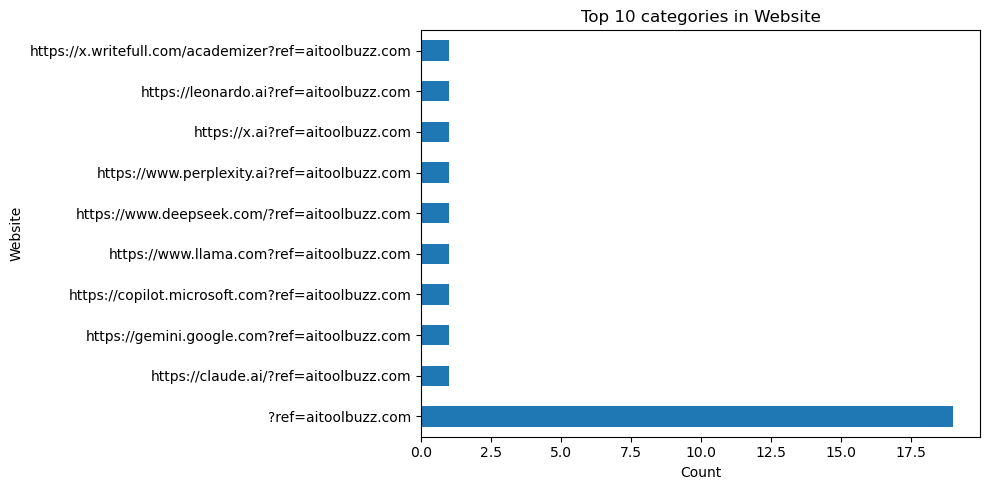

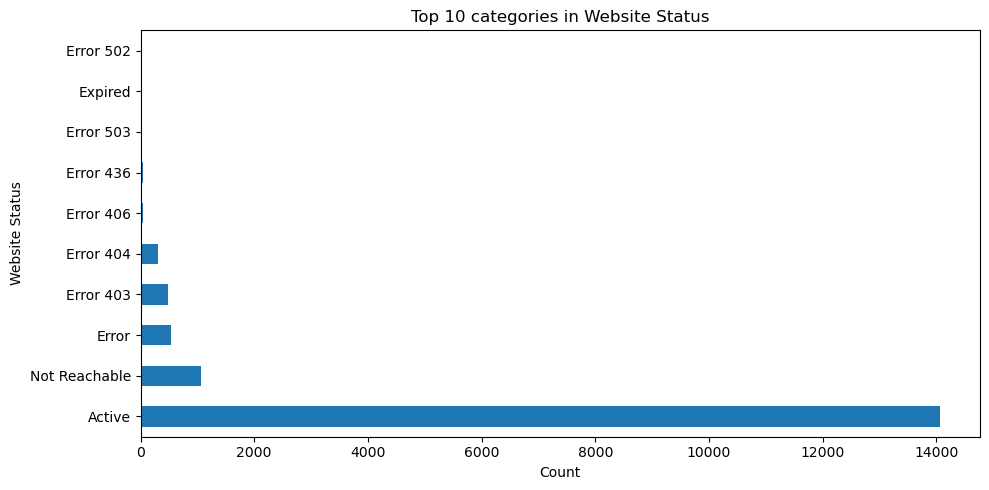

In [6]:
for col in cat_cols:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(10).plot(kind='barh')
    plt.title(f"Top 10 categories in {col}")
    plt.xlabel("Count")
    plt.tight_layout()
    plt.show()